# Exercise 1 Confusion Matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### a) Load first dataset  - Scores

In [3]:
datasetA = pd.read_csv('ex1-system-a.csv',names=['0','1','2','3','4','5','6','7','8','9','y_true','unused'], sep = ";")
datasetA = datasetA.drop('unused', axis = 1) # drop the last colomn without any information in it.
classes_name = ['0','1','2','3','4','5','6','7','8','9']
nb_classes = 10
datasetA.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,5.348450e-08,7.493480e-10,8.083470e-07,2.082290e-05,5.222360e-10,2.330260e-08,5.241270e-12,9.999650e-01,4.808590e-07,0.000013,7
1,1.334270e-03,3.202960e-05,8.504280e-01,1.669090e-03,1.546460e-07,2.412940e-04,1.448280e-01,1.122810e-11,1.456330e-03,0.000011,2
2,3.643050e-06,9.962760e-01,2.045910e-03,4.210530e-04,2.194020e-05,1.644130e-05,2.838160e-04,3.722960e-04,5.150120e-04,0.000044,1
3,9.998200e-01,2.550390e-10,1.112010e-05,1.653200e-05,5.375730e-10,8.999750e-05,9.380920e-06,4.464470e-05,2.418440e-06,0.000006,0
4,2.092460e-08,7.464220e-08,3.560820e-05,5.496200e-07,9.988960e-01,3.070920e-08,2.346150e-04,9.748010e-07,1.071610e-06,0.000831,4


In [4]:
y_true = datasetA['y_true'].values
y_scores_A = datasetA[classes_name].values   #isolate the matrix of scores
y_pred_A = np.argmax(y_scores_A,axis=1)      #elect winner class

### b) What is the overall error rate of the system ?

In [9]:
y_true

array([7, 2, 1, ..., 4, 5, 6])

In [143]:
### START YOUR CODE
a = 0
i = 0
while i < y_true.size:
    if y_true[i] != y_pred_A[i]:
        a = a + 1
    i = i + 1

### END YOUR CODE

print('overall rate of the system :', a*100/y_true.size)

overall rate of the system : 10.73


### c) Compute and report the confusion matrix of the system.

We create a second one our selfs and ckeck if it is correct with the "correct" one from sklearn.

In [52]:
import pandas as pd

def confusion_matrix2(y_true,y_pred,nb_classes):
    """
    Arguments:
    y_true -- groud truth labels
    y_pred -- predicted values
    n_classes -- number of classes
    
    Returns:
    the confusion matrix as 2d numpy array 
    """
    ### START YOUR CODE
    
    classes = np.unique(y_true) # extract the different classes
    matrix = np.zeros((len(classes), len(classes))) # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):

            matrix[i, j] = np.sum((y_true == classes[i]) & (y_pred == classes[j]))
    ### END YOUR CODE
    return matrix

In [53]:
cm_A = confusion_matrix2(y_true, y_pred_A,nb_classes)
cm_A

array([[9.440e+02, 0.000e+00, 1.100e+01, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+01, 7.000e+00, 5.000e+00, 1.000e+00],
       [0.000e+00, 1.112e+03, 2.000e+00, 3.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 9.000e+00, 0.000e+00],
       [1.000e+01, 6.000e+00, 9.210e+02, 1.200e+01, 1.500e+01, 3.000e+00,
        1.900e+01, 1.500e+01, 2.600e+01, 5.000e+00],
       [1.000e+00, 1.000e+00, 3.100e+01, 8.620e+02, 2.000e+00, 7.200e+01,
        5.000e+00, 1.400e+01, 1.200e+01, 1.000e+01],
       [2.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 9.100e+02, 1.000e+00,
        1.200e+01, 6.000e+00, 4.000e+00, 3.600e+01],
       [1.200e+01, 3.000e+00, 6.000e+00, 2.900e+01, 1.900e+01, 7.680e+02,
        1.900e+01, 9.000e+00, 2.100e+01, 6.000e+00],
       [1.400e+01, 3.000e+00, 2.100e+01, 2.000e+00, 2.200e+01, 2.800e+01,
        8.650e+02, 0.000e+00, 3.000e+00, 0.000e+00],
       [0.000e+00, 1.400e+01, 3.000e+01, 9.000e+00, 7.000e+00, 2.000e+00,
        1.000e+00, 9.290e+02, 3.000e+

In [54]:
# TEST - we use the sklearn builit in functionality
from sklearn.metrics import confusion_matrix
verif_cm = confusion_matrix(y_true,y_pred_A)

cm_A = confusion_matrix2(y_true, y_pred_A,nb_classes)
# verification for our confusion matrix function
print((cm_A == verif_cm).sum() == nb_classes**2)

True


In [34]:
verif_cm

array([[ 944,    0,   11,    0,    0,    2,   10,    7,    5,    1],
       [   0, 1112,    2,    3,    1,    4,    3,    1,    9,    0],
       [  10,    6,  921,   12,   15,    3,   19,   15,   26,    5],
       [   1,    1,   31,  862,    2,   72,    5,   14,   12,   10],
       [   2,    3,    6,    2,  910,    1,   12,    6,    4,   36],
       [  12,    3,    6,   29,   19,  768,   19,    9,   21,    6],
       [  14,    3,   21,    2,   22,   28,  865,    0,    3,    0],
       [   0,   14,   30,    9,    7,    2,    1,  929,    3,   33],
       [  12,   16,   18,   26,   24,   46,   22,   19,  772,   19],
       [  10,    4,    6,   22,   53,   18,    0,   48,    4,  844]])

In [55]:
cm_A

array([[9.440e+02, 0.000e+00, 1.100e+01, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+01, 7.000e+00, 5.000e+00, 1.000e+00],
       [0.000e+00, 1.112e+03, 2.000e+00, 3.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 9.000e+00, 0.000e+00],
       [1.000e+01, 6.000e+00, 9.210e+02, 1.200e+01, 1.500e+01, 3.000e+00,
        1.900e+01, 1.500e+01, 2.600e+01, 5.000e+00],
       [1.000e+00, 1.000e+00, 3.100e+01, 8.620e+02, 2.000e+00, 7.200e+01,
        5.000e+00, 1.400e+01, 1.200e+01, 1.000e+01],
       [2.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 9.100e+02, 1.000e+00,
        1.200e+01, 6.000e+00, 4.000e+00, 3.600e+01],
       [1.200e+01, 3.000e+00, 6.000e+00, 2.900e+01, 1.900e+01, 7.680e+02,
        1.900e+01, 9.000e+00, 2.100e+01, 6.000e+00],
       [1.400e+01, 3.000e+00, 2.100e+01, 2.000e+00, 2.200e+01, 2.800e+01,
        8.650e+02, 0.000e+00, 3.000e+00, 0.000e+00],
       [0.000e+00, 1.400e+01, 3.000e+01, 9.000e+00, 7.000e+00, 2.000e+00,
        1.000e+00, 9.290e+02, 3.000e+

Now we want to plot the confusion matrix.

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

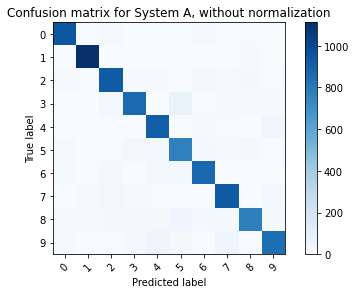

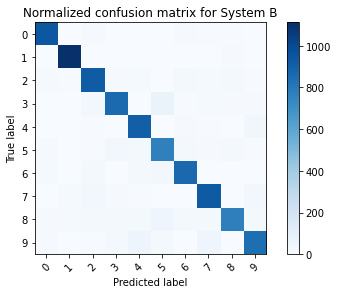

In [69]:
plt.figure()
plot_confusion_matrix(cm_A, classes=classes_name,title='Confusion matrix for System A, without normalization')

plt.figure()
plot_confusion_matrix(cm_A, classes=classes_name, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()


### d) What are the worst and best classes in terms of precision and sensitivity (recall) ?

In [66]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

perf_measure(y_true, y_pred_A)

precision = np.sum(true_pos / (true_pos + false_pos))
recall = np.sum(true_pos / (true_pos + false_neg))




cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

(1112, 50, 944, 61)

In [97]:
def precision_per_class(cm):
    """
    Aguments:
    cm -- confusion matrix
    Returns:
    Precision per class, i.e. a numpy array of length given by the number of classes
    """
    ### START YOUR CODE
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    return precision
    ### END YOUR CODE

In [98]:
def recall_per_class(cm):
    """
    Aguments:
    cm -- confusion matrix
    Returns:
    Recall per class, i.e. a numpy array of length given by the number of classes
    """
    ### START YOUR CODE  
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    return recall
    ### END YOUR CODE

In [102]:
precisions = precision_per_class(cm_A)
# should return '1' as best (95.7%)
# and '5' as worst (81.4%) 

best_class = np.argmax(precisions)
worst_class = np.argmin(precisions)
print('best precision class  : ', best_class, '[', precisions[best_class],']')
print('worst precision class : ', worst_class, '[', precisions[worst_class],']')

best precision class  :  1 [ 0.9569707401032702 ]
worst precision class :  5 [ 0.8135593220338984 ]


In [103]:
recalls = recall_per_class(cm_A)
# should return '1' as best (97.97%)
# and '8' as worst (79.26%) 

best_class = np.argmax(recalls)
worst_class = np.argmin(recalls)
print('best recall class  : ', best_class, '[',recalls[best_class],']')
print('worst recall class : ', worst_class, '[',recalls[worst_class],']')

best recall class  :  1 [ 0.9797356828193833 ]
worst recall class :  8 [ 0.7926078028747433 ]


### e) Load second dataset  - Scores

Find the output of a second system B. It contains the same ground truth values - but different predictions.
What is the best system between (a) and (b) in terms of error rate and F1.

In [104]:
datasetB = pd.read_csv('ex1-system-b.csv',names=['0','1','2','3','4','5','6','7','8','9','y_true','unused'], sep = ";")
datasetB = datasetB.drop('unused', axis = 1) # drop the last colomn without any information in it.
datasetB.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,1.675320e-11,2.584750e-11,1.796600e-07,1.229790e-05,6.932370e-16,2.499490e-11,3.506180e-16,9.999870e-01,9.081160e-11,1.482410e-09,7
1,2.348330e-08,1.081260e-06,9.999700e-01,2.765590e-05,3.209940e-12,4.008910e-09,1.594070e-06,3.191980e-12,1.573330e-07,9.856860e-12,2
2,5.653110e-09,9.997150e-01,2.231520e-04,6.524200e-06,4.818190e-07,1.273150e-07,2.173000e-06,1.416840e-05,3.833510e-05,6.327910e-08,1
3,9.999860e-01,1.825320e-10,9.027630e-06,8.147850e-09,7.237800e-12,3.341060e-09,1.152500e-06,3.915740e-06,7.381230e-11,4.782200e-08,0
4,1.349270e-08,2.039600e-10,3.194220e-07,1.773480e-10,9.996150e-01,1.231720e-08,2.821290e-07,2.402690e-06,1.690530e-08,3.820520e-04,4


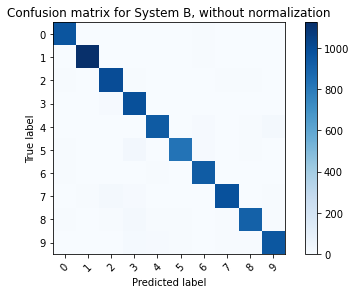

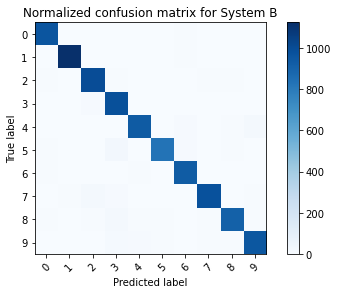

In [106]:
y_true = datasetB['y_true'].values
y_scores_B = datasetB[classes_name].values   #isolate the matrix of scores
y_pred_B = np.argmax(y_scores_B,axis=1)      #elect winner class

cm_B = confusion_matrix2(y_true,y_pred_B,nb_classes)

plt.figure()
plot_confusion_matrix(cm_B, classes=classes_name,title='Confusion matrix for System B, without normalization')

plt.figure()
plot_confusion_matrix(cm_B, classes=classes_name, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()

In [135]:
def system_precision(cm):
    ### START YOUR CODE
    return np.diag(cm) / np.sum(cm, axis = 0)
    ### END YOUR CODE

def system_recall(cm):
    ### START YOUR CODE
    return np.diag(cm) / np.sum(cm, axis = 1)
    ### END YOUR CODE
    
def system_accuracy(cm):
    ### START YOUR CODE
    return np.diag(cm)/np.sqrt(cm.size)
    ### END YOUR CODE
    
def system_f1_score(cm):
    ### START YOUR CODE
    return 2*np.diag(cm)/(np.sum(cm, axis = 1) + np.sum(cm, axis = 0))
    ### END YOUR CODE

In [136]:
print('System A\n\trecall : ',system_recall(cm_A),'\n\tprecision : ',system_precision(cm_A),'\n\taccuracy : ',system_accuracy(cm_A),'\n\tf1-score : ',system_f1_score(cm_A))
print('System B\n\trecall : ',system_recall(cm_B),'\n\tprecision : ',system_precision(cm_B),'\n\taccuracy : ',system_accuracy(cm_B),'\n\tf1-score : ',system_f1_score(cm_B))

System A
	recall :  [0.96326531 0.97973568 0.89244186 0.85346535 0.92668024 0.86098655
 0.90292276 0.9036965  0.7926078  0.83647175] 
	precision :  [0.93930348 0.95697074 0.87547529 0.89141675 0.86419753 0.81355932
 0.90481172 0.88645038 0.89871944 0.88469602] 
	accuracy :  [ 94.4 111.2  92.1  86.2  91.   76.8  86.5  92.9  77.2  84.4] 
	f1-score :  [0.9511335  0.96821942 0.88387716 0.87202833 0.89434889 0.83660131
 0.90386625 0.89499037 0.84233497 0.8599083 ]
System B
	recall :  [0.98265306 0.98942731 0.96511628 0.97524752 0.95519348 0.93049327
 0.97077244 0.95428016 0.93634497 0.94648167] 
	precision :  [0.96978852 0.98422436 0.95038168 0.92488263 0.96800826 0.97189696
 0.95580678 0.96745562 0.96304118 0.95883534] 
	accuracy :  [ 96.3 112.3  99.6  98.5  93.8  83.   93.   98.1  91.2  95.5] 
	f1-score :  [0.97617841 0.98681898 0.95769231 0.94939759 0.96155818 0.95074456
 0.96323149 0.96082272 0.94950547 0.95261845]


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_A))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.88      0.89      0.88      1032
           3       0.89      0.85      0.87      1010
           4       0.86      0.93      0.89       982
           5       0.81      0.86      0.84       892
           6       0.90      0.90      0.90       958
           7       0.89      0.90      0.89      1028
           8       0.90      0.79      0.84       974
           9       0.88      0.84      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_B))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.92      0.98      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.93      0.95       892
           6       0.96      0.97      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Optional: check with the recall_score and precision_score function of SciKit Learn ```from sklearn.metrics import recall_score, precision_score``` that you obtain correct recall and precision values (use the argument ```average="macro"```).